# Week 1: Day 4pm // Pandas: Data Cleaning & Analyzing Obesity in England

Download dataset: https://github.com/ardhiraka/PFDS_sources

## Data Cleaning with Pandas

> According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data.

**Sources of Missing Values**

Before we dive into code, it’s important to understand the sources of missing data. Here’s some typical reasons why data is missing:

- User forgot to fill in a field.
- Data was lost while transferring manually from a legacy database.
- There was a programming error.
- Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

As you can see, some of these sources are just simple random mistakes. Other times, there can be a deeper reason why data is missing.

Before you start cleaning a data set, it’s a good idea to just get a general feel for the data. After that, you can put together a plan to clean the data.

Start by asking the following questions:

- What are the features?
- What are the expected types (int, float, string, boolean)?
- Is there obvious missing data (values that Pandas can detect)?
- Is there other types of missing data that’s not so obvious (can’t easily detect with Pandas)?


In [5]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('property_data.csv')

In [9]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


With the .head()method, we can easily see the first few rows.

Now we can answer our original question, what are my features? It’s pretty easy to infer the following features from the column names:

- ST_NUM: Street number
- ST_NAME: Street name
- OWN_OCCUPIED: Is the residence owner occupied
- NUM_BEDROOMS: Number of bedrooms

We can also answer, what are the expected types?

- ST_NUM: float or int… some sort of numeric type
- ST_NAME: string
- OWN_OCCUPIED: string… Y (“Yes”) or N (“No”)
- NUM_BEDROOMS: float or int, a numeric type

To answer the next two questions, we’ll need to start getting more in-depth width Pandas. Let’s start looking at examples of how to detect missing values.

In [13]:
df['OWN_OCCUPIED'] = df['OWN_OCCUPIED'].astype('category')

### Standard Missing Values

So what do I mean by “standard missing values”? These are missing values that Pandas can detect.

Going back to our original dataset, let’s take a look at the “Street Number” column.

<img src='https://miro.medium.com/max/830/0*veOKXtXllBUoIOr-.jpg' />

In the third row there’s an empty cell. In the seventh row there’s an “NA” value.

Clearly these are both missing values. Let’s see how Pandas deals with these.

In [11]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [12]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

Taking a look at the column, we can see that Pandas filled in the blank space with “NA”. Using the `isnull() `method, we can confirm that both the missing value and “NA” were recognized as missing values. Both boolean responses are True.

This is a simple example, but highlights an important point. Pandas will recognize both empty cells and “NA” types as missing values. In the next section, we’ll take a look at some types that Pandas won’t recognize.

### Non-Standard Missing Values

Sometimes it might be the case where there’s missing values that have different formats.

Let’s take a look at the “Number of Bedrooms” column.

<img src='https://miro.medium.com/max/830/0*wlRcCspEXuvanHPP.jpg' />

In this column, there’s four missing values.

- n/a
- NA
- —
- na

From the previous section, we know that Pandas will recognize “NA” as a missing value, but what about the others? Let’s take a look.

In [14]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [15]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

Just like before, Pandas recognized the “NA” as a missing value. Unfortunately, the other types weren’t recognized.

If there’s multiple users manually entering data, then this is a common problem. Maybe i like to use “n/a” but you like to use “na”.

An easy way to detect these various formats is to put them in a list. Then when we import the data, Pandas will recognize them right away. Here’s an example of how we would do that.

In [16]:
missing_values = ["n/a", "na", "--"]

In [17]:
df = pd.read_csv("property_data.csv", na_values = missing_values)

In [18]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [19]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

This time, all of the different formats were recognized as missing values.

You might not be able to catch all of these right away. As you work through the data and see other types of missing values, you can add them to the list.

It’s important to recognize these non-standard types of missing values for purposes of summarizing and transforming missing values. If you try and count the number of missing values before converting these non-standard types, you could end up missing a lot of missing values.

In the next section we’ll take a look at a more complicated, but very common, type of missing value.

### Unexpected Missing Values

So far we’ve seen standard missing values, and non-standard missing values. What if we have an unexpected type?
For example, if our feature is expected to be a string, but there’s a numeric type, then technically this is also a missing value.

Let’s take a look at the “Owner Occupied” column to see what I’m talking about.

<img src='https://miro.medium.com/max/829/0*RPJE5nhrI0Kgu2ls.jpg' />

From our previous examples, we know that Pandas will detect the empty cell in row seven as a missing value. Let’s confirm with some code.

In [ ]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [ ]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In the fourth row, there’s the number 12. The response for Owner Occupied should clearly be a string (Y or N), so this numeric type should be a missing value.

This example is a little more complicated so we’ll need to think through a strategy for detecting these types of missing values. There’s a number of different approaches, but here’s the way that I’m going to work through this one.

- Loop through the OWN_OCCUPIED column
- Try and turn the entry into an integer
- If the entry can be changed into an integer, enter a missing value
- If the number can’t be an integer, we know it’s a string, so keep going

Let’s take a look at the code and then we’ll go through it in detail.

In [23]:
df['OWN_OCCUPIED'].unique()

array(['Y', 'N', nan], dtype=object)

In [21]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError: #(elif)
        pass
    cnt+=1

In [ ]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [24]:
df['ST_NAME'].unique()

array(['PUTNAM', 'LEXINGTON', 'BERKELEY', 'WASHINGTON', 'TREMONT'],
      dtype=object)

In the code we’re looping through each entry in the “Owner Occupied” column. To try and change the entry to an integer, we’re using int(row).

If the value can be changed to an integer, we change the entry to a missing value using Numpy’s `np.nan`.

On the other hand, if it can’t be changed to an integer, we pass and keep going.

You’ll notice that we used `try` and `except` `ValueError`. This is called exception handling, and we use this to handle errors.

If we were to try and change an entry into an integer and it couldn’t be changed, then a ValueError would be returned, and the code would stop. To deal with this, we use exception handling to recognize these errors, and keep going.

### Summarizing Missing Values

After we’ve cleaned the missing values, we will probably want to summarize them. For instance, we might want to look at the total number of missing values for each feature.

In [25]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [ ]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

Other times we might want to do a quick check to see if we have any missing values at all.

In [26]:
df.isnull().values.any()

True

We might also want to get a total count of missing values.

In [ ]:
df.isnull().sum().sum()

12

### Replacing

Often times you’ll have to figure out how you want to handle missing values.

Sometimes you’ll simply want to delete those rows, other times you’ll replace them.

In [33]:
df['ST_NUM']

0    104.0
1    197.0
2    180.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [28]:
# Maybe you just want to fill in missing values with a single value.

df['ST_NUM'].fillna(125, inplace=True)

More likely, you might want to do a location based imputation. Here’s how you would do that.

In [32]:
df.loc[2,'ST_NUM'] = 180

A very common way to replace missing values is using a median.

In [34]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [37]:
median

3.0

In [35]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,180.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [39]:
# Drop missing value

df.dropna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
2,100003000.0,180.0,LEXINGTON,N,3.0,1,850.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [40]:
df['NUM_BATH'].dropna()

0         1
1       1.5
2         1
4         2
5         1
6    HURLEY
7         1
8         2
Name: NUM_BATH, dtype: object

In [41]:
df.dropna(axis=1)

,ST_NUM,ST_NAME,NUM_BEDROOMS
0,104.0,PUTNAM,3.0
1,197.0,LEXINGTON,3.0
2,180.0,LEXINGTON,3.0
3,201.0,BERKELEY,1.0
4,203.0,BERKELEY,3.0
5,207.0,BERKELEY,3.0
6,125.0,WASHINGTON,2.0
7,213.0,TREMONT,3.0
8,215.0,TREMONT,3.0


In [42]:
df['NUM_BEDROOMS'].dropna()

0    3.0
1    3.0
2    3.0
3    1.0
4    3.0
5    3.0
6    2.0
7    3.0
8    3.0
Name: NUM_BEDROOMS, dtype: float64

In [44]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,180.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [47]:
df[df['NUM_BATH'].notna()]


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,180.0,LEXINGTON,N,3.0,1,850.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [45]:
df.dropna(subset = ['PID','ST_NUM'], inplace =True)

In [46]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,180.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## Analyzing Obesity in England

The data is taken from Data.gov.uk. We’ll be using the 2014 XLS file.

Investigate:

> Children are getting fatter every decade

In [1]:
!pip install --upgrade xlrd

In [6]:
%matplotlib inline
data = pd.ExcelFile('obesity.xls')

In [7]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

We will be focusing on sheet 7.2. Now if you look at 7.2 in Excel, you will see that the top 4 rows and bottom 14 rows contain useless info. Let me rephrase: It’s useful for humans, but not for our script. We only need rows 5-18.

In [8]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [9]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


The first line represents the column headers. Right off the bat you can see Pandas is quite smart since it picked up most of the headers correctly. Except for the first one, of course - e.g., Unnamed: 0. Why is that? Simple. Look at the file in Excel, and you see that it is missing a header for the year.

Another problem is that we have an empty line in the original file, and that is showing up as NaN (Not a number).

So we now need to do two things:

- Rename the first header to Year, and
- Get rid of any empty rows.

In [10]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


Here we told Pandas to rename the column Unnamed: 0 to Year. using the in-built function rename().

> inplace = True modifies the existing object. Without this, Pandas will create a new object and return that.

Next let’s drop the empty rows filled with NaN:

In [11]:
data_age.dropna(inplace=True)

There is one more thing we need to do that will make our lives easier. If you look at the data_age table, the first value is a number. This is the index, and Pandas uses the default Excel practice of having a number as the index. However, we want to change the index to Year. This will make plotting much easier, since the index is usually plotted as the x axis.

In [12]:
data_age.set_index('Year', inplace=True)

In [13]:
data_age.value_counts().head()

Total   Under 16  16-24  25-34  35-44   45-54  55-64  65-74  75 and over
1275.0  400.0     65.0   136.0  289.0   216.0  94.0   52.0   23.0           1
1711.0  579.0     67.0   174.0  391.0   273.0  151.0  52.0   24.0           1
2035.0  547.0     107.0  287.0  487.0   364.0  174.0  36.0   32.0           1
2564.0  583.0     96.0   341.0  637.0   554.0  258.0  72.0   20.0           1
3862.0  656.0     184.0  461.0  1069.0  872.0  459.0  118.0  43.0           1
dtype: int64

In [ ]:
data_age.rename(column)

Now we can plot what we have.

<AxesSubplot:xlabel='Year'>

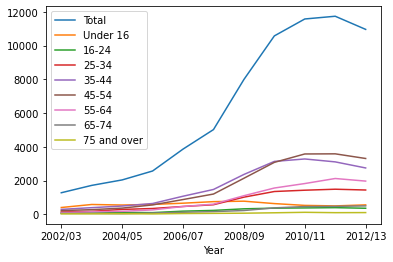

In [61]:
data_age.plot()

Oops. There is a problem: Our original data contains a total field that is overshadowing everything else. We need to get rid of it.

In [62]:
data_age_minus_total = data_age.drop('Total', axis=1)

Let’s plot what we have now.

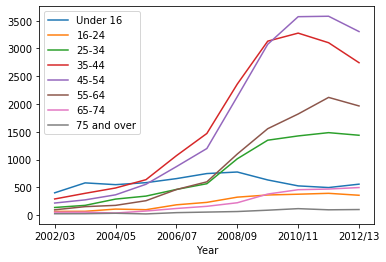

In [ ]:
data_age_minus_total.plot()

Much better. We can actually see individual age groups now. Can you see which age group has the highest obesity?

Coming back to our original question: Are children getting fatter?

Let’s just plot a small section of the data: children under the age of 16 and grown ups in the age range of 35-44.

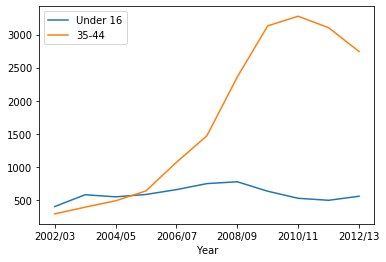

In [ ]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

So who is getting fatter?

While children’s obesity has gone slightly down, their parents have ballooned. So it seems the parents need to worry about themselves rather than their children.